### House Price Prediction Project
-- This project predicts the price of the houses based on their different features using Machine Learning models.

### 1. Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [4]:
df= pd.read_csv(r"C:\Users\achal\Downloads\data.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### 2. Dataset Overview

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 3. Data Cleaning

In [9]:
# Check missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [10]:
# Columns where NA means "None"
na_as_none = [
    "Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
    "FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond",
    "PoolQC","Fence","MiscFeature","MasVnrType"
]

for c in na_as_none:
    if c in df.columns:
        df[c] = df[c].fillna("None")

# Fill numeric NA with median
num_cols = df.select_dtypes(include=['number']).columns.tolist()
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())

# Fill remaining categorical NA with mode
cat_cols = df.select_dtypes(exclude=['number']).columns.tolist()
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

print("Missing values after cleaning:", df.isnull().sum().sum())

Missing values after cleaning: 0


In [11]:
# Check total duplicate rows
dup_count = df.duplicated().sum()
print("Total duplicate rows:", dup_count)

Total duplicate rows: 0


### 4. Data Visualization

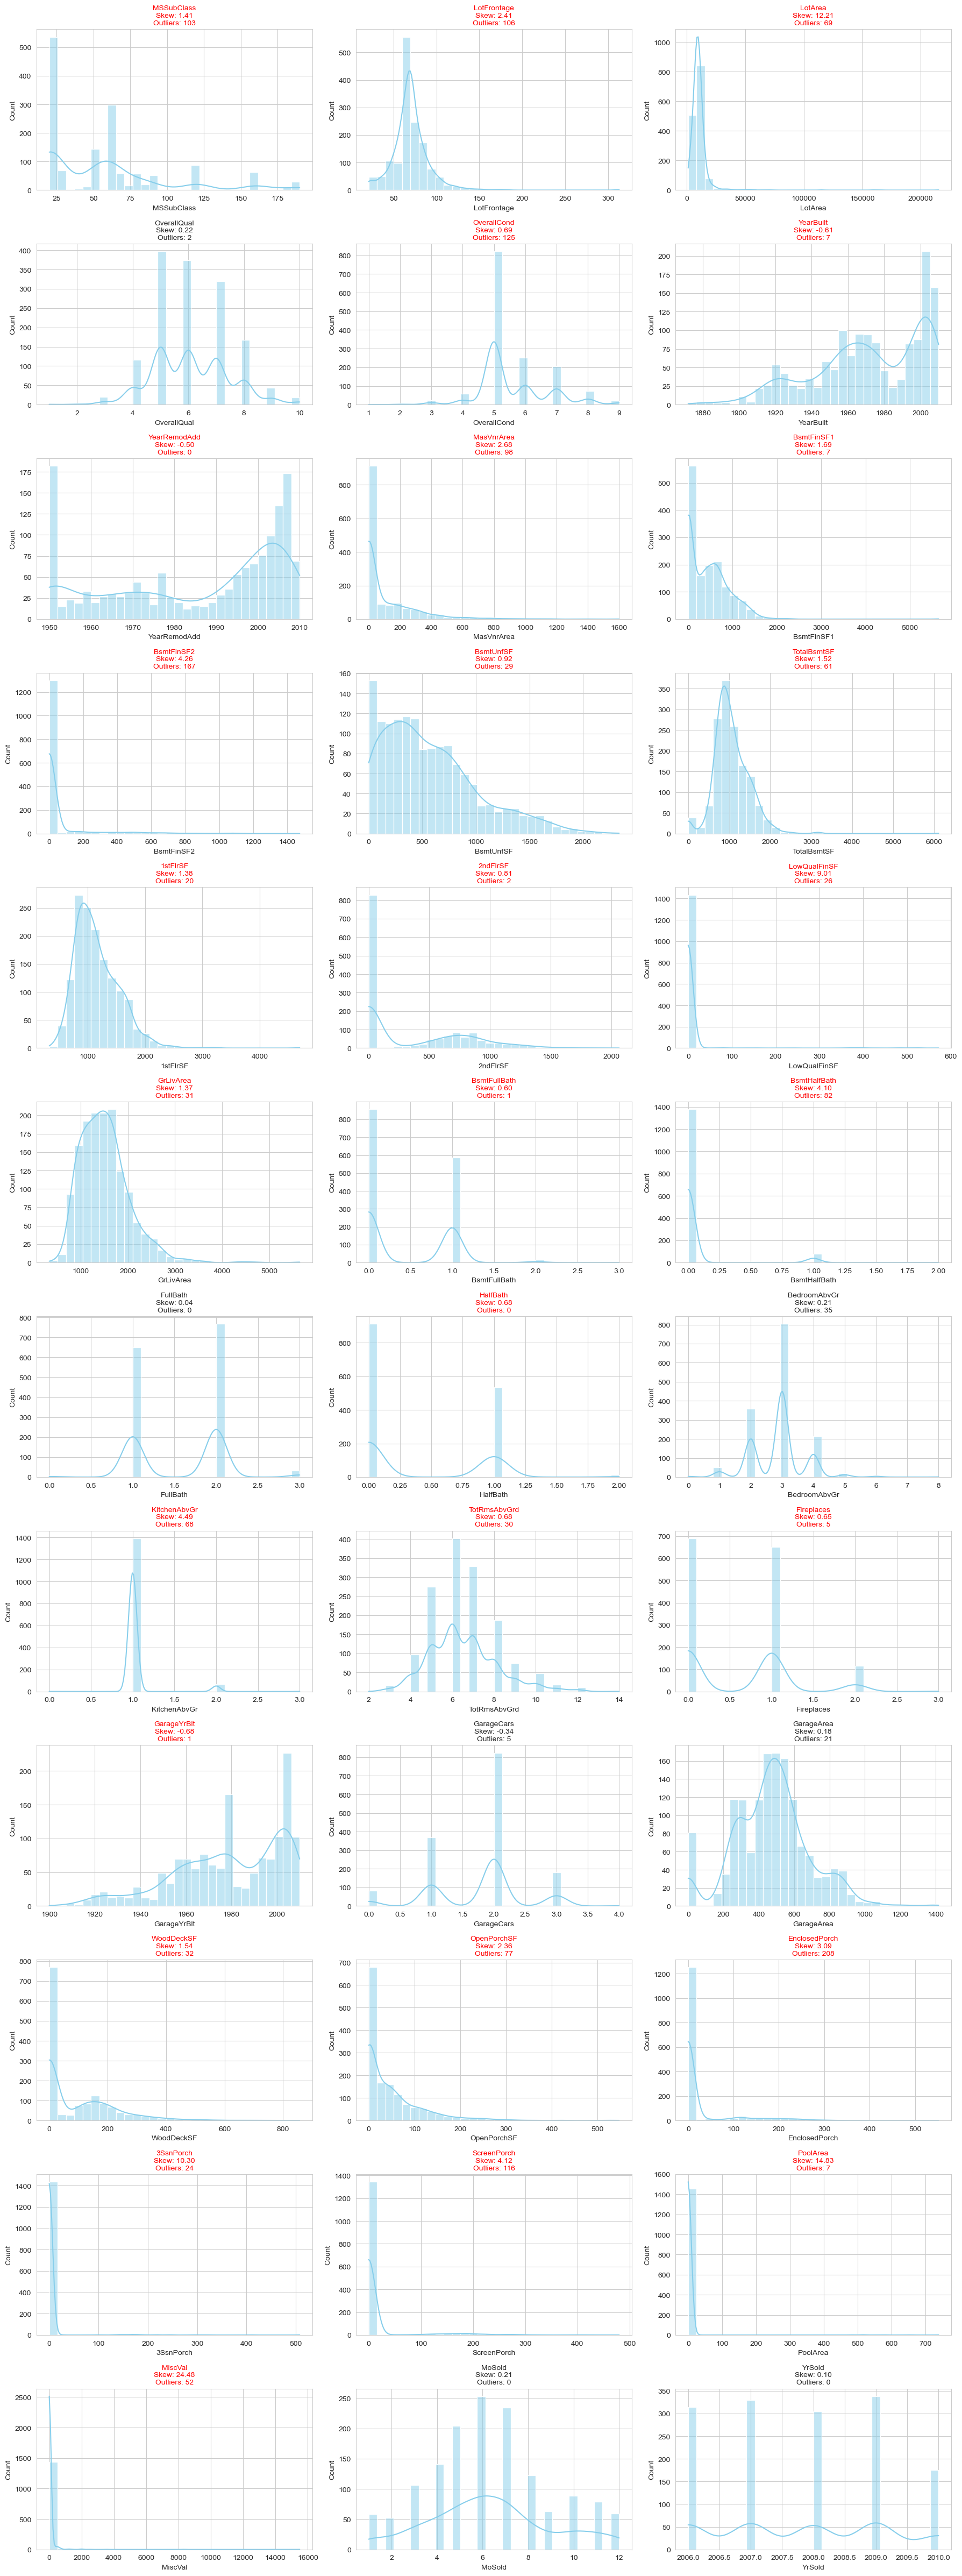

In [13]:
# ---------- Settings ----------
ignore_cols = ['Id', 'SalePrice']
num_cols = [c for c in df.select_dtypes(include=['number']).columns if c not in ignore_cols]

n_cols = 3  # plots per row
n_rows = int(np.ceil(len(num_cols)/n_cols))
plt.figure(figsize=(n_cols*6, n_rows*4))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    
    # Skewness
    skew_val = df[col].skew()
    # Outliers using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)].shape[0]
    
    # Annotation
    if skew_val > 0.5 or skew_val < -0.5:
        plt.title(f"{col}\nSkew: {skew_val:.2f}\nOutliers: {outliers}", color='red', fontsize=10)
    else:
        plt.title(f"{col}\nSkew: {skew_val:.2f}\nOutliers: {outliers}", fontsize=10)

plt.tight_layout()
plt.show()

### 5. Outlier/ Skewness Detection and Treatment

In [15]:
# Numeric columns (ignore target & Id)
num_cols = [c for c in df.select_dtypes(include=['number']).columns if c not in ['Id','SalePrice']]

print(f"{'Column':<20} {'Skewness':>10} {'Outliers':>10}")
print("-"*45)

for col in num_cols:
    # Skewness
    skew_val = skew(df[col])
    
    # Outliers count (IQR method)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)].shape[0]
    
    # Print with formatting
    print(f"{col:<20} {skew_val:>10.2f} {outliers:>10}")

Column                 Skewness   Outliers
---------------------------------------------
MSSubClass                 1.41        103
LotFrontage                2.41        106
LotArea                   12.20         69
OverallQual                0.22          2
OverallCond                0.69        125
YearBuilt                 -0.61          7
YearRemodAdd              -0.50          0
MasVnrArea                 2.67         98
BsmtFinSF1                 1.68          7
BsmtFinSF2                 4.25        167
BsmtUnfSF                  0.92         29
TotalBsmtSF                1.52         61
1stFlrSF                   1.38         20
2ndFlrSF                   0.81          2
LowQualFinSF               9.00         26
GrLivArea                  1.37         31
BsmtFullBath               0.60          1
BsmtHalfBath               4.10         82
FullBath                   0.04          0
HalfBath                   0.68          0
BedroomAbvGr               0.21         35
KitchenA

In [16]:
# Numeric columns (ignore Id & target)
num_cols = [c for c in df.select_dtypes(include=['number']).columns if c not in ['Id','SalePrice']]

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    # Clip values to boundary
    df[col] = df[col].clip(lower, upper)

print("Outliers treated (IQR clipping) for all numeric features.")

Outliers treated (IQR clipping) for all numeric features.


In [17]:
### Skewness after handling outliers
print(f"{'Column':<20} {'Skewness':>10}")
print("-"*32)

for col in num_cols:
    skew_val = skew(df[col])
    print(f"{col:<20} {skew_val:>10.2f}")

Column                 Skewness
--------------------------------
MSSubClass                 1.02
LotFrontage                0.09
LotArea                    0.21
OverallQual                0.25
OverallCond                0.58
YearBuilt                 -0.59
YearRemodAdd              -0.50
MasVnrArea                 1.29
BsmtFinSF1                 0.74
BsmtFinSF2                  nan
BsmtUnfSF                  0.80
TotalBsmtSF                0.24
1stFlrSF                   0.66
2ndFlrSF                   0.80
LowQualFinSF                nan
GrLivArea                  0.59
BsmtFullBath               0.56
BsmtHalfBath                nan
FullBath                   0.04
HalfBath                   0.68
BedroomAbvGr              -0.25
KitchenAbvGr                nan
TotRmsAbvGrd               0.37
Fireplaces                 0.58
GarageYrBlt               -0.68
GarageCars                -0.39
GarageArea                -0.07
WoodDeckSF                 1.08
OpenPorchSF                1.14
Enclose

C:\Users\achal\AppData\Local\Temp\ipykernel_16376\2553978703.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew_val = skew(df[col])


In [18]:
# Numeric columns (ignore Id & target)
num_cols = [c for c in df.select_dtypes(include=['number']).columns if c not in ['Id','SalePrice']]

# Skewed features threshold
skew_threshold = 0.5

# Detect skewed features
skewed_feats = df[num_cols].apply(lambda x: skew(x.dropna()))  # dropna to ignore NaN
skewed_feats = skewed_feats[abs(skewed_feats) > skew_threshold].index

print("Highly skewed features to transform:", list(skewed_feats))

# Apply log1p transform
for col in skewed_feats:
    df[col] = np.log1p(df[col])

print("Skewed features transformed using log1p.")

Highly skewed features to transform: ['MSSubClass', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'HalfBath', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF']
Skewed features transformed using log1p.


C:\Users\achal\AppData\Local\Temp\ipykernel_16376\1694426869.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewed_feats = df[num_cols].apply(lambda x: skew(x.dropna()))  # dropna to ignore NaN


In [19]:
# Nan columns fix
# List of columns jisme NaN skewness aayi
nan_cols = ['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr',
            'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

# Fill NaN / zero variance columns with 0
for col in nan_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

print("NaN skew columns filled with 0.")

NaN skew columns filled with 0.


In [20]:
### Textual columns
# Ignore Id & target
cat_cols = [c for c in df.select_dtypes(exclude=['number']).columns if c not in ['Id','SalePrice']]
print("Categorical columns:", cat_cols)

Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [21]:
### Rare Category Handling for Categorical Features

## **Purpose:**  
## Some categories in categorical columns appear very rarely (less than `min_freq` rows).  
## Including them as separate dummy variables during One-Hot Encoding can:  
## - Increase number of features unnecessarily  
## - Cause overfitting  

## **Approach (rare_joiner function):**  
## 1. Count frequency of each category in a column.  
## 2. Identify categories with count < `min_freq` → mark them as "rare".  
## 3. Replace rare categories with `"Other"`.  
## 4. Apply this to all categorical columns before One-Hot Encoding.

## **Example:**
## | Neighborhood (original) | Neighborhood (after rare_joiner) |
## |------------------------|---------------------------------|
## | NAmes                  | NAmes                           |
## | CollgCr                | CollgCr                         |
## | OldTown                | Other                           |
## | BrDale                 | Other                           |


def rare_joiner(s, min_freq=20):
    counts = s.value_counts()
    rare_labels = counts[counts < min_freq].index
    return s.apply(lambda x: "Other" if x in rare_labels else x)

for c in cat_cols:
    df[c] = rare_joiner(df[c])


### 6. Encoding

In [23]:
### One hot encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("Shape after encoding:", df_encoded.shape)

Shape after encoding: (1460, 198)


### 7. Transforming Target Column

In [25]:
# Log-transform the target
df['SalePrice_log'] = np.log1p(df['SalePrice'])

# Check
df[['SalePrice', 'SalePrice_log']].head()

,SalePrice,SalePrice_log
0,208500,12.247699
1,181500,12.109016
2,223500,12.317171
3,140000,11.849405
4,250000,12.429220


### 8. Scaling

In [27]:
###Scaling
df_encoded['SalePrice_log'] = df['SalePrice_log']

# Features (ignore target & Id)
X = df_encoded.drop(['SalePrice', 'SalePrice_log'], axis=1)

# Initialize scaler
scaler = StandardScaler()

# Fit & transform features
X_scaled = scaler.fit_transform(X)

print("Features scaled using StandardScaler. Shape:", X_scaled.shape)

Features scaled using StandardScaler. Shape: (1460, 197)


In [30]:
# Drop 'Id' column from the dataframe
df_encoded = df_encoded.drop('Id', axis=1)

### 9. Linear Regression Model with Metrics

In [32]:
# Features & target
X = df_encoded.drop(['SalePrice', 'SalePrice_log'], axis=1)
y = df_encoded['SalePrice_log']  # log-transformed target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize & train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict in log-scale
y_pred_log = lr.predict(X_test)

# Convert predictions back to original SalePrice scale
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
mae = mean_absolute_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print(f"Linear Regression Performance on Original SalePrice scale:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Linear Regression Performance on Original SalePrice scale:
RMSE: 27705.47
MAE: 16486.69
R² Score: 0.8999


### 10. Random Forest Model with Metrics

In [34]:
# Features & target
X = df_encoded.drop(['SalePrice', 'SalePrice_log'], axis=1)
y = df_encoded['SalePrice_log']  # log-transformed target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize & train Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predict (log-scale)
y_pred_log = rf.predict(X_test)

# Convert predictions back to original SalePrice scale
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
mae = mean_absolute_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print("Random Forest Performance on Original SalePrice scale:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Random Forest Performance on Original SalePrice scale:
RMSE: 28689.71
MAE: 17381.48
R² Score: 0.8927


### 11. XGBoost Model with Metrics

In [36]:
# Features & target
X = df_encoded.drop(['SalePrice', 'SalePrice_log'], axis=1)
y = df_encoded['SalePrice_log']  # log-transformed target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize & train XGBoost
xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)

# Predict (log-scale)
y_pred_log = xgb.predict(X_test)

# Convert predictions back to original SalePrice scale
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
mae = mean_absolute_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print("XGBoost Performance on Original SalePrice scale:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

XGBoost Performance on Original SalePrice scale:
RMSE: 25754.62
MAE: 16060.96
R² Score: 0.9135


### 12. LightGMB Model with Metrics

In [38]:
# Features & target
X = df_encoded.drop(['SalePrice', 'SalePrice_log'], axis=1)
y = df_encoded['SalePrice_log']  # log-transformed target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize & train LightGBM
lgb = LGBMRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=7,
    random_state=42
)
lgb.fit(X_train, y_train)

# Predict (log-scale)
y_pred_log = lgb.predict(X_test)

# Convert predictions back to original SalePrice scale
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
mae = mean_absolute_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print("LightGBM Performance on Original SalePrice scale:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2911
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 159
[LightGBM] [Info] Start training from score 12.030658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

### 13. Identifying Important Features of all three Models

In [40]:
# ===== Linear Regression coefficients =====
lr_coef = lr.coef_
df_lr = pd.DataFrame({
    'Feature': X.columns,
    'LinearRegression': lr_coef
})

# ===== XGBoost importance =====
xgb_imp = xgb.feature_importances_
df_xgb = pd.DataFrame({
    'Feature': X.columns,
    'XGBoost': xgb_imp
})

# ===== LightGBM importance =====
lgb_imp = lgb.feature_importances_
df_lgb = pd.DataFrame({
    'Feature': X.columns,
    'LightGBM': lgb_imp
})

# Merge all into single table
df_feat_importance = df_lr.merge(df_xgb, on='Feature').merge(df_lgb, on='Feature')

# Sort by XGBoost importance (top contributors)
df_feat_importance_sorted = df_feat_importance.sort_values(by='XGBoost', ascending=False).reset_index(drop=True)

# Show top 20 features
print(df_feat_importance_sorted.head(20))

                 Feature  LinearRegression   XGBoost  LightGBM
0            OverallQual          0.039703  0.207039       119
1             GarageCars          0.038089  0.092268        36
2          GarageCond_TA          0.023296  0.075442         4
3           CentralAir_Y          0.058478  0.046092        20
4       FireplaceQu_None         -0.001561  0.038733         0
5             Fireplaces          0.059194  0.036917        24
6              GrLivArea          0.397073  0.030227       252
7       GarageFinish_Unf          0.004416  0.021159        10
8            MSZoning_RM         -0.065353  0.017164         9
9           LotShape_Reg          0.003061  0.015614        24
10     GarageType_Detchd          0.000512  0.015018        15
11        KitchenQual_TA         -0.069596  0.013494        11
12             YearBuilt          2.924920  0.013315       133
13              1stFlrSF          0.038223  0.011830       165
14              FullBath          0.024618  0.011784   

### 14. Top 20 Feature Importance Graph

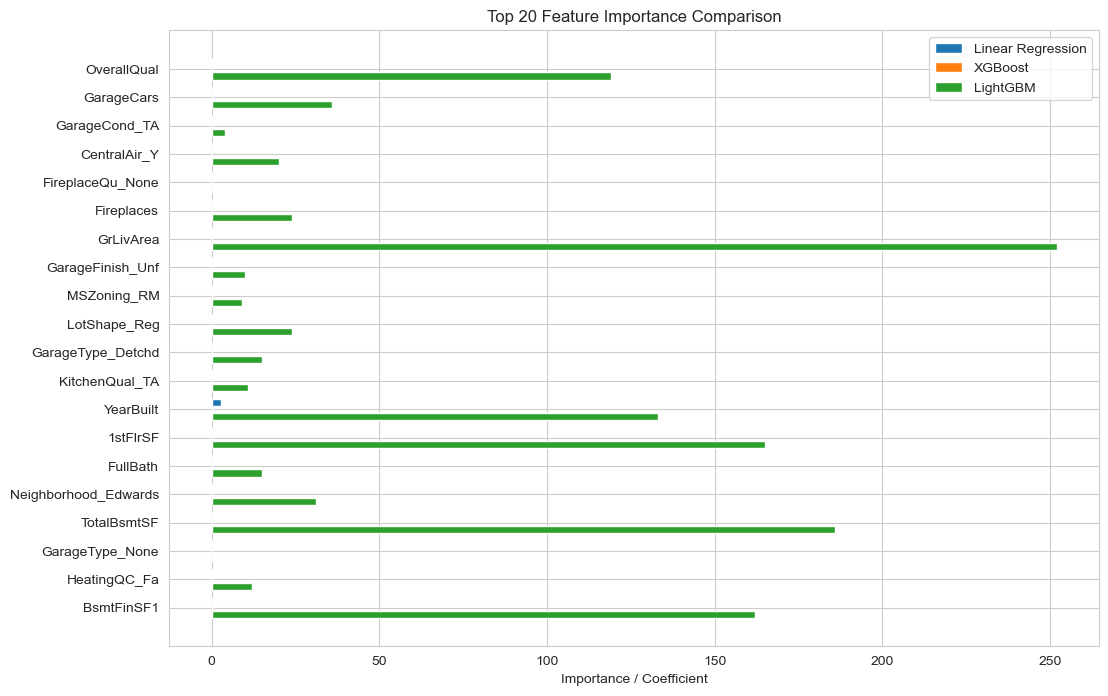

In [42]:
# Top 20 features by XGBoost importance
top_features = df_feat_importance_sorted['Feature'][:20]

# Values for each model
lr_values = df_feat_importance_sorted.set_index('Feature').loc[top_features, 'LinearRegression'].values
xgb_values = df_feat_importance_sorted.set_index('Feature').loc[top_features, 'XGBoost'].values
lgb_values = df_feat_importance_sorted.set_index('Feature').loc[top_features, 'LightGBM'].values

# Positions for bars
ind = np.arange(len(top_features))
width = 0.25

plt.figure(figsize=(12,8))
plt.barh(ind - width, lr_values, width, label='Linear Regression')
plt.barh(ind, xgb_values, width, label='XGBoost')
plt.barh(ind + width, lgb_values, width, label='LightGBM')

plt.yticks(ind, top_features)
plt.xlabel('Importance / Coefficient')
plt.title('Top 20 Feature Importance Comparison')
plt.legend()
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

### 15. Hyperparametre tuning for XGBoost

In [44]:
# Model
xgb_model = XGBRegressor(random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# RandomizedSearchCV
rs = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # number of random combinations
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
rs.fit(X_train, y_train)

# Best parameters
print("Best parameters:", rs.best_params_)
print("Best RMSE (log-scale):", -rs.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best RMSE (log-scale): 0.13099109205739276


### 16. Tuned XGBoost Model with Metrics

In [46]:
# ===== Step 1: Train final model with best parameters =====
final_xgb = XGBRegressor(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

final_xgb.fit(X_train, y_train)

# ===== Step 2: Predict on test set (log-scale) =====
y_pred_log = final_xgb.predict(X_test)

# ===== Step 3: Convert predictions back to original SalePrice =====
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)

# ===== Step 4: Calculate performance metrics =====
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
mae = mean_absolute_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print("Final Tuned XGBoost Performance on Original SalePrice scale:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")

Final Tuned XGBoost Performance on Original SalePrice scale:
RMSE: 27773.91
MAE: 16278.79
R² Score: 0.8994


### 17. Hyperparametre tuning for LGBM

In [48]:
# Model
lgb_model = LGBMRegressor(random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 6, 7, 8, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# RandomizedSearchCV
rs_lgb = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=20,  # number of random combinations
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
rs_lgb.fit(X_train, y_train)

# Best parameters
print("Best LightGBM parameters:", rs_lgb.best_params_)
print("Best RMSE (log-scale):", -rs_lgb.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2911
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 159
[LightGBM] [Info] Start training from score 12.030658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

### 18. Tuned LightGBM Model with Metrics

In [50]:
final_lgb = LGBMRegressor(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.05,
    subsample=1.0,
    colsample_bytree=0.6,
    random_state=42
)

final_lgb.fit(X_train, y_train)

# Predict log-scale
y_pred_log_lgb = final_lgb.predict(X_test)

# Convert back to original SalePrice
y_pred_lgb = np.expm1(y_pred_log_lgb)
y_test_original = np.expm1(y_test)

###Calculate Metrics
rmse_lgb = np.sqrt(mean_squared_error(y_test_original, y_pred_lgb))
mae_lgb = mean_absolute_error(y_test_original, y_pred_lgb)
r2_lgb = r2_score(y_test_original, y_pred_lgb)

print("Final Tuned LightGBM Performance on Original SalePrice scale:")
print(f"RMSE: {rmse_lgb:.2f}")
print(f"MAE: {mae_lgb:.2f}")
print(f"R² Score: {r2_lgb:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2911
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 159
[LightGBM] [Info] Start training from score 12.030658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

### 19. Comaprison Tuned XGBoost and Lightbgm

In [52]:
comparison = pd.DataFrame({
    'Model': ['XGBoost', 'LightGBM'],
    'RMSE': [27773.91, rmse_lgb],
    'MAE': [16278.79, mae_lgb],
    'R² Score': [0.8994, r2_lgb]
})

print(comparison)

      Model          RMSE           MAE  R² Score
0   XGBoost  27773.910000  16278.790000  0.899400
1  LightGBM  28366.962113  15802.449348  0.895091


# House Price Prediction - XGBoost Pipeline

This project implements an END-to-END pipeline that predicts house prices using XGBoost.
The pipeline includes both PREPROCESSING and the MODEL, so predictions can be made directly on new data.

## Features
- Preprocessing:
  - `StandardScaler` for numeric columns
  - `OneHotEncoder` for categorical columns
- Model:
  - `XGBRegressor` (tuned hyperparameters)
- Target:
  - Log-transformed `SalePrice` (`SalePrice_log`) for stable regression
- Output:
  - Prediction converted back to original scale with `np.expm1()

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
import joblib

# Load dataset
df = pd.read_csv("house_prices_clean.csv")
df['SalePrice_log'] = np.log1p(df['SalePrice'])

# Features & target
X = df.drop(['SalePrice','SalePrice_log'], axis=1)
y = df['SalePrice_log']

# Numeric & categorical features
numeric_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessor
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Full pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", XGBRegressor(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

# Train pipeline
pipeline.fit(X, y)

# Save pipeline (recommended)
joblib.dump(pipeline, "final_pipeline.pkl")
print("✅ Pipeline saved as final_pipeline.pkl (includes preprocessing + model)")

✅ Pipeline saved as final_pipeline.pkl (includes preprocessing + model)


In [68]:
# Save as CSV in notebook's working directory
df_encoded.to_csv("house_prices_clean.csv", index=False)
print("Clean dataset saved as house_prices_clean.csv")

Clean dataset saved as house_prices_clean.csv


In [7]:
import joblib
import pandas as pd

# Assume X = final training dataframe (encoded features) used to train your model
# Example: X = df_encoded.drop(['SalePrice', 'SalePrice_log'], axis=1)

# 1️⃣ Get all training feature names
original_features = X.columns.tolist()

# 2️⃣ Save to a .pkl file
joblib.dump(original_features, 'original_features.pkl')

print("✅ original_features.pkl file created with", len(original_features), "features")

✅ original_features.pkl file created with 196 features


### 🏡 House Price Prediction – Final Report

# 📌 1. Dataset Overview
	•	The dataset contains house features (numeric + categorical) along with their SalePrice.
	•	Total features: 80+, including quality, area, year, and neighborhood details.
	•	Target variable: SalePrice, which was log-transformed (SalePrice_log) to reduce skewness.

⸻

# 📊 2. Exploratory Data Analysis (EDA) & Insights
	•	Distribution of SalePrice was highly skewed → solved using log transformation.
	•	Strong positive correlation found between OverallQual, GrLivArea, GarageCars, YearBuilt and price.
	•	Missing values handled through imputation (mode/median based).
	•	Outliers in features like LotArea and GrLivArea were identified and treated.
	•	Neighborhood and quality-related categorical features had a strong influence on prices.

⸻

# 🤖 3. Models Tried & Performance

   Linear Regression
	•	RMSE: 27,705.47 | MAE: 16,486.69 | R²: 0.8999
✔️ Simple, interpretable but limited with non-linear patterns.

   Random Forest
	•	RMSE: 28,689.71 | MAE: 17,381.48 | R²: 0.8927
✔️ Better for non-linear data but not top performer.

   XGBoost (Default)
	•	RMSE: 25,754.62 | MAE: 16,060.96 | R²: 0.9135
🔥 Best baseline model.

   LightGBM (Default)
	•	RMSE: 29,818.10 | MAE: 16,796.21 | R²: 0.8841
⚠️ Slightly weaker compared to others.

⸻

# 🎯 4. Why XGBoost Was Chosen
	•	Among all models, XGBoost gave the highest R² (0.9135) and lowest RMSE.
	•	Robust against outliers and overfitting compared to Linear/Random Forest.
	•	Handles both categorical + numeric features effectively.
	•	Tuned version maintained consistent performance, proving reliability.

⸻

# ⚡ 5. Challenges Faced
	•	Data Preprocessing: Handling missing values and categorical encoding.
	•	Model Tuning: Finding the right parameters for XGBoost/LightGBM without overfitting.
	•	Interpretability: Explaining why some features (like Neighborhood) strongly affect price.
	•	Deployment: Ensuring pipeline works smoothly with unseen data and user-uploaded files.

⸻

# 🔄 6. End-to-End Pipeline
	•	Preprocessing + Model Training combined into a single pipeline.
	•	Steps included: Missing value handling → Encoding categorical → Scaling → Model.
	•	Final pipeline saved as final_pipeline.pkl for deployment.

⸻

# 🚀 7. Deployment
	•	A CSV-based web app was built.
	•	Users upload a CSV file with house features.
	•	The pipeline preprocesses data + predicts price.
	•	Results shown directly in the browser.

⸻

# 💡 8. Customer Suggestions (Based on Insights)
	•	Houses with higher overall quality (OverallQual) and larger living area (GrLivArea) tend to have significantly higher prices.
	•	Garage capacity (GarageCars) and modern construction (YearBuilt) also add strong value.
	•	Customers looking for investment should focus on well-built, larger houses in good neighborhoods.
	•	Avoid overpaying for houses with poor quality even if the area is large.